In [14]:
import numpy as np
import pandas as pd
from googletrans import Translator, constants
from tqdm import tqdm
from multiprocessing import Pool
from difflib import SequenceMatcher

tqdm.pandas()

translator = Translator()

In [2]:
def translate(x):
    parts = x.split()
    parts = [' '.join(parts[i:i+100]) for i in range(0,len(parts),100)]
    try:
        return ' '.join([ translator.translate(y, src='fr', dest="en").text for y in parts])
    except:
        return 'error'

In [3]:
def transDes(i):
    return translate(df.description[i]),i
def transText(i):
    return translate(df.clean[i]),i

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,title,description,channel,publishTime,tags,category,duration,commentNumber,likesNumber,views,...,quality,license,videoId,trendingTimes,trendingDuration,rawText,clean,wordCount,transDes,transText
0,Aya Nakamura - Dégaine feat. Damso (Clip offic...,Nouveau single 'Dégaine' en featuring avec Dam...,Aya Nakamura,2022-03-09 16:00:02+00:00,[],10,3:29,8548,330388,28553344,...,hd,1.0,7Lp9clJSB7E,8.0,7 days 00:00:00,"J""ai vu comment tu m'as regardée mon charme a...","J""ai vu comment tu m'as regardée mon charme fa...",451,New single 'Dégaine' featuring Damso available...,I saw how you looked at me my charm had its ef...
1,Aya Nakamura - Bobo (Clip officiel),#tiktoksong #chilikuku #hmmhmm\n\nNouveau sing...,Aya Nakamura,2021-05-27 15:00:12+00:00,[],10,3:14,13982,521150,50240770,...,hd,1.0,3zsPWw2H9PE,11.0,5 days 00:00:00,Chéri Coco fais-moi mmm mmm J’veux le bifton p...,Chéri Coco fais-moi mmm mmm J’veux le bifton p...,380,#tiktoksong #chilikuku #hmmhmm\n\nNew single '...,Chéri Coco give me mmm mmm I want the bifton n...
2,Aya Nakamura - Fly (Clip officiel),Aya Nakamura – Fly (Live) (Clip officiel)\nThe...,Aya Nakamura,2021-03-17 15:00:14+00:00,[],10,4:31,6727,182208,9791467,...,hd,1.0,d_3vEFFfgH0,6.0,5 days 00:00:00,"À tes cotés, j’ai des ailes C’est comme si t’a...","À tes cotés, j’ai des ailes C’est comme si t’a...",302,Aya Nakamura – Fly (Live) (Official Clip)\nThe...,"By your side, I have wings It's as if you've a..."
3,Aya Nakamura - Plus Jamais feat. Stormzy (Clip...,Aya Nakamura - Plus Jamais feat. @Stormzy(Clip...,Aya Nakamura,2020-12-18 11:00:10+00:00,"['aya nakamura', 'plus jamais', 'aya nakamura ...",10,3:1,7399,280505,33803807,...,hd,1.0,cIQMdSu-xTc,8.0,7 days 00:00:00,"Oh, no, no, no J’devais l’accepter, ça fait ma...","Oh, no, no, J’devais l’accepter, ça fait mal m...",294,Aya Nakamura - Never Again feat. @Stormzy(Offi...,"Oh, no, no, I had to accept it, it hurts but I..."
4,AYA - 13.11.2020 - NOUVEL ALBUM,Nouvel album 'AYA' enfin disponible ici : http...,Aya Nakamura,2020-10-15 14:00:09+00:00,"['aya nakamura', 'AYA', '13.11.2020', 'Album',...",10,1:1,1024,53779,1427975,...,hd,1.0,gE26yA7djuc,0.0,0.0,"ma fille... elle est l'amour pur, la famille e...","fille... elle est l'amour pur, la famille est ...",77,New album 'AYA' finally available here: https:...,"daughter...she is pure love, family is so impo..."


In [6]:
des = ['' for _ in range(len(df))]
text = ['' for _ in range(len(df))]

pool = Pool(processes=80)
for t,i in tqdm(pool.imap(transDes, df.index.tolist()), total=len(df)):
    des[i] = t

for t,i in tqdm(pool.imap(transText, df.index.tolist()), total=len(df)):
    text[i] = t

100%|█████████████████████████████████████| 11552/11552 [10:24<00:00, 18.49it/s]


In [7]:
df['transDes'] = des
df['transText'] = text

In [8]:
df = df[df.transText != 'error'] #only two videos are concerned

In [9]:
df.head()

,title,description,channel,publishTime,tags,category,duration,commentNumber,likesNumber,views,...,quality,license,videoId,trendingTimes,trendingDuration,rawText,clean,wordCount,transDes,transText
0,Aya Nakamura - Dégaine feat. Damso (Clip offic...,Nouveau single 'Dégaine' en featuring avec Dam...,Aya Nakamura,2022-03-09 16:00:02+00:00,[],10,3:29,8548,330388,28553344,...,hd,1.0,7Lp9clJSB7E,8.0,7 days 00:00:00,"J""ai vu comment tu m'as regardée mon charme a...","J""ai vu comment tu m'as regardée mon charme fa...",451,New single 'Dégaine' featuring Damso available...,I saw how you looked at me my charm had its ef...
1,Aya Nakamura - Bobo (Clip officiel),#tiktoksong #chilikuku #hmmhmm\n\nNouveau sing...,Aya Nakamura,2021-05-27 15:00:12+00:00,[],10,3:14,13982,521150,50240770,...,hd,1.0,3zsPWw2H9PE,11.0,5 days 00:00:00,Chéri Coco fais-moi mmm mmm J’veux le bifton p...,Chéri Coco fais-moi mmm mmm J’veux le bifton p...,380,#tiktoksong #chilikuku #hmmhmm New single 'Bob...,Chéri Coco give me mmm mmm I want the bifton n...
2,Aya Nakamura - Fly (Clip officiel),Aya Nakamura – Fly (Live) (Clip officiel)\nThe...,Aya Nakamura,2021-03-17 15:00:14+00:00,[],10,4:31,6727,182208,9791467,...,hd,1.0,d_3vEFFfgH0,6.0,5 days 00:00:00,"À tes cotés, j’ai des ailes C’est comme si t’a...","À tes cotés, j’ai des ailes C’est comme si t’a...",302,Aya Nakamura – Fly (Live) (Official clip) The ...,"By your side, I have wings It's as if you've a..."
3,Aya Nakamura - Plus Jamais feat. Stormzy (Clip...,Aya Nakamura - Plus Jamais feat. @Stormzy(Clip...,Aya Nakamura,2020-12-18 11:00:10+00:00,"['aya nakamura', 'plus jamais', 'aya nakamura ...",10,3:1,7399,280505,33803807,...,hd,1.0,cIQMdSu-xTc,8.0,7 days 00:00:00,"Oh, no, no, no J’devais l’accepter, ça fait ma...","Oh, no, no, J’devais l’accepter, ça fait mal m...",294,Aya Nakamura - Never Again feat. @Stormzy(Offi...,"Oh, no, no, I had to accept it, it hurts but I..."
4,AYA - 13.11.2020 - NOUVEL ALBUM,Nouvel album 'AYA' enfin disponible ici : http...,Aya Nakamura,2020-10-15 14:00:09+00:00,"['aya nakamura', 'AYA', '13.11.2020', 'Album',...",10,1:1,1024,53779,1427975,...,hd,1.0,gE26yA7djuc,0.0,0.0,"ma fille... elle est l'amour pur, la famille e...","fille... elle est l'amour pur, la famille est ...",77,New album 'AYA' finally available here: https:...,"daughter...she is pure love, family is so impo..."


In [15]:
def match(a,b):
    return SequenceMatcher(None, a[:100], b[:100]).ratio()

In [16]:
df['ratio'] = df.progress_apply(lambda x: match(x.clean, x.transText), axis=1)

100%|████████████████████████████████████| 11552/11552 [00:11<00:00, 969.94it/s]


In [17]:
df['ratioDes'] = df.progress_apply(lambda x: match(x.description, x.transDes), axis=1)

100%|███████████████████████████████████| 11552/11552 [00:08<00:00, 1429.93it/s]


In [22]:
df[df.ratioDes>0.9].head()

,title,description,channel,publishTime,tags,category,duration,commentNumber,likesNumber,views,...,videoId,trendingTimes,trendingDuration,rawText,clean,wordCount,transDes,transText,ratio,ratioDes
34,MHD - AFRO TRAP Part.7 (La Puissance) [Major L...,"New album ""Mansa"" available :\nhttps://mhd.lnk...",Mhd Officiel,2018-01-19 15:57:25+00:00,"['la puissance', 'mhd', 'major lazer', 'diplo'...",10,3:15,2559,103131,8751132,...,VhMW87avFIM,0.0,0.0,"La puissance\nGros, c'est la puissance, c'est ...","La puissance Gros, c'est la puissance, c'est l...",257,"New album ""Mansa"" available: https://mhd.lnk.t...","The power Big, it's the power, it's the power ...",0.090000,0.940000
516,Aymane Serhani ft. Ahmed Chawki - VEN AQUÍ (Ar...,Aymane Serhani ft. Ahmed Chawki - VEN AQUÍ (Ar...,Aymane Serhani,2021-05-21 15:55:08+00:00,"['aymane serhani', 'ahmed chawki', 'VEN AQUÍ',...",10,3:59,6284,161508,9247168,...,QGbAbqIiFfQ,0.0,0.0,étranger étranger étranger est étranger ...,étranger étranger étranger est étranger étrang...,14,Aymane Serhani ft. Ahmed Chawki - VEN AQUÍ (Ar...,stranger stranger stranger is stranger strange...,0.769231,0.980000
867,PRANK JE NOIE BOBBY !!! ÇA TOURNE MAL BOBBY A ...,Omg ... :'(,MichouOff,2018-05-02 14:15:25+00:00,[],24,1:44,3413,68773,1361722,...,JCgciaDBLKM,0.0,0.0,les potiches forza est bien mieux aujourd'hui ...,les potiches forza est bien mieux aujourd'hui ...,207,Omg... :'(,the potiches forza is much better today there ...,0.470000,0.952381
1015,MHD - Sagacité (Clip Officiel),"New album ""Mansa"" available :\nhttps://mhd.lnk...",Mhd Officiel,2021-11-17 16:00:11+00:00,"['mhd', 'sagacité', 'mansa', 'mh', 'paw paw pa...",10,3:54,4916,147658,5573102,...,QuSwJO2e0TM,7.0,6 days 00:00:00,La saga la saga la cité ouais C’est la sagacit...,La saga la saga la cité ouais C’est la sagacit...,267,"New album ""Mansa"" available: https://mhd.lnk.t...",The saga the saga the city yeah It's sagacity ...,0.500000,0.950000
1016,MHD feat. Tiakola - Pololo (Clip Officiel),"New album ""Mansa"" available :\nhttps://mhd.lnk...",Mhd Officiel,2021-07-14 14:00:08+00:00,[],10,3:15,9250,380104,37054064,...,jj0xIgP8VHk,8.0,7 days 00:00:00,"Pololo Polopolopolo\nAh laisser tomber, Pololo...","Pololo Polopolopolo Ah laisser tomber, Pololo ...",364,"New album ""Mansa"" available: https://mhd.lnk.t...","Pololo Polopolopolo Ah drop it, Pololo Polopol...",0.680000,0.940000


<AxesSubplot:>

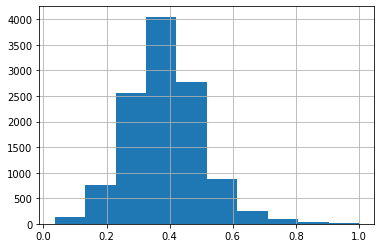

In [19]:
df.ratio.hist()

In [20]:
df

,title,description,channel,publishTime,tags,category,duration,commentNumber,likesNumber,views,...,videoId,trendingTimes,trendingDuration,rawText,clean,wordCount,transDes,transText,ratio,ratioDes
0,Aya Nakamura - Dégaine feat. Damso (Clip offic...,Nouveau single 'Dégaine' en featuring avec Dam...,Aya Nakamura,2022-03-09 16:00:02+00:00,[],10,3:29,8548,330388,28553344,...,7Lp9clJSB7E,8.0,7 days 00:00:00,"J""ai vu comment tu m'as regardée mon charme a...","J""ai vu comment tu m'as regardée mon charme fa...",451,New single 'Dégaine' featuring Damso available...,I saw how you looked at me my charm had its ef...,0.41,0.71
1,Aya Nakamura - Bobo (Clip officiel),#tiktoksong #chilikuku #hmmhmm\n\nNouveau sing...,Aya Nakamura,2021-05-27 15:00:12+00:00,[],10,3:14,13982,521150,50240770,...,3zsPWw2H9PE,11.0,5 days 00:00:00,Chéri Coco fais-moi mmm mmm J’veux le bifton p...,Chéri Coco fais-moi mmm mmm J’veux le bifton p...,380,#tiktoksong #chilikuku #hmmhmm New single 'Bob...,Chéri Coco give me mmm mmm I want the bifton n...,0.61,0.86
2,Aya Nakamura - Fly (Clip officiel),Aya Nakamura – Fly (Live) (Clip officiel)\nThe...,Aya Nakamura,2021-03-17 15:00:14+00:00,[],10,4:31,6727,182208,9791467,...,d_3vEFFfgH0,6.0,5 days 00:00:00,"À tes cotés, j’ai des ailes C’est comme si t’a...","À tes cotés, j’ai des ailes C’est comme si t’a...",302,Aya Nakamura – Fly (Live) (Official clip) The ...,"By your side, I have wings It's as if you've a...",0.32,0.90
3,Aya Nakamura - Plus Jamais feat. Stormzy (Clip...,Aya Nakamura - Plus Jamais feat. @Stormzy(Clip...,Aya Nakamura,2020-12-18 11:00:10+00:00,"['aya nakamura', 'plus jamais', 'aya nakamura ...",10,3:1,7399,280505,33803807,...,cIQMdSu-xTc,8.0,7 days 00:00:00,"Oh, no, no, no J’devais l’accepter, ça fait ma...","Oh, no, no, J’devais l’accepter, ça fait mal m...",294,Aya Nakamura - Never Again feat. @Stormzy(Offi...,"Oh, no, no, I had to accept it, it hurts but I...",0.50,0.79
4,AYA - 13.11.2020 - NOUVEL ALBUM,Nouvel album 'AYA' enfin disponible ici : http...,Aya Nakamura,2020-10-15 14:00:09+00:00,"['aya nakamura', 'AYA', '13.11.2020', 'Album',...",10,1:1,1024,53779,1427975,...,gE26yA7djuc,0.0,0.0,"ma fille... elle est l'amour pur, la famille e...","fille... elle est l'amour pur, la famille est ...",77,New album 'AYA' finally available here: https:...,"daughter...she is pure love, family is so impo...",0.55,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11547,ILS NOUS ONT PIÉGÉ !,Mon Application Officielle : \n\n - Sur IOS : ...,Anas,2017-11-16 20:36:35+00:00,"['Bledart', 'Gameplay', 'Call Of Duty : WWII',...",20,22:55,440,20737,916964,...,dDEMj2u8HgU,0.0,0.0,cools à michel bédard j'espère que vous allez ...,cools à michel bédard j'espère que vous allez ...,3125,My Official Application: - On IOS: https://itu...,cool to michel bédard i hope you are well and ...,0.48,0.79
11548,J'AI DES SUPERS-POUVOIRS !,Première vidéo sur le nouveau Star Wars : Batt...,Anas,2017-11-16 18:05:03+00:00,"['Bledart', 'Gameplay', 'Star Wars : Battlefro...",20,22:41,609,14999,535699,...,kcXnOhdsv9E,0.0,0.0,non je n'en ai vu que la musique était au bon ...,non je n'en ai vu que la musique était au bon ...,3612,First video on the new Star Wars: BattleFront ...,no I only saw that the music was at the right ...,0.30,0.60
11549,J'AI RENCONTRÉ LE MAL ABSOLU,Bienvenue sur Remothered : Tormented Fathers. ...,Anas,2017-11-15 19:15:15+00:00,"['Bledart', 'Gameplay', 'Remothered : Tormente...",20,23:40,987,18394,349661,...,KYgVIXEQDf8,0.0,0.0,cools et mécène blédard j'espère que vous alle...,cools et mécène blédard j'espère que vous alle...,1923,Welcome to Remothered: Tormented Fathers. We a...,cools and patron bledard hope you are doing we...,0.35,0.54
11550,UNE MISSION TRÈS DANGEREUSE !,Suite de nos aventures sur le nouveau Call Of ...,Anas,2017-11-13 19:16:32+00:00,"['Bledart', 'Gameplay', 'Call Of Duty WW2', 'P...",20,29:31,515,21099,793345,...,0754OEbLfRY,0.0,0.0,coucou les amis c'est le blédard j'e

In [10]:
df.to_csv('data.csv',index=False)

In [11]:
df = pd.read_csv('data.csv')